# 01. Importing libraries

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Importing data

In [6]:
path = r'/Users/user/Documents/Data analysis/E6 Dashboards/Data'

In [7]:
datalis = pd.read_csv(os.path.join(path, 'Cleaned data', 'listings_rev.csv'))

# 03. Selecting variables

In [9]:
df = datalis.drop(columns = ['Unnamed: 0', 'id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'reviews_per_month', 'room_type'])

In [10]:
df1= datalis['room_type']

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           20030 non-null  int64
 1   minimum_nights                  20030 non-null  int64
 2   number_of_reviews               20030 non-null  int64
 3   calculated_host_listings_count  20030 non-null  int64
 4   availability_365                20030 non-null  int64
dtypes: int64(5)
memory usage: 782.6 KB
None


In [12]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,59,3,248,1,44
1,160,4,42,1,47
2,80,1,233,2,198
3,125,14,1,2,141
4,150,2,171,1,199


# 04. Heatmap

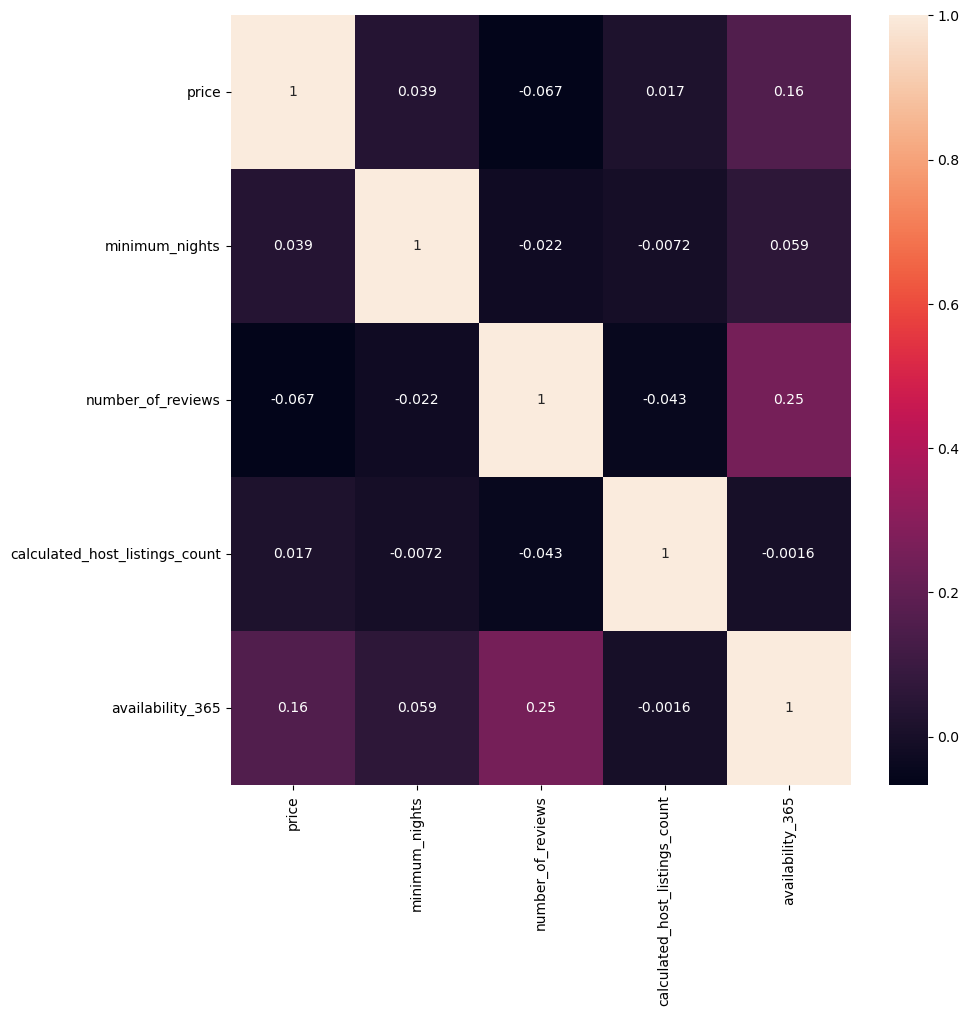

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The majority of variables are not correlated. The strongest one (0.25) shows a weak positive relationship between variables 'number of reviews' and 'availabilty 365', which means that more days per year the property is available to rent, more reviews that property will have. The only other relationship (weak positive correlation - 0.16) was detected between 'price' and 'availability_356' which indicates that properties that are available for larger proportion of the year tend to be more expensive.

# 05. Scatterplot

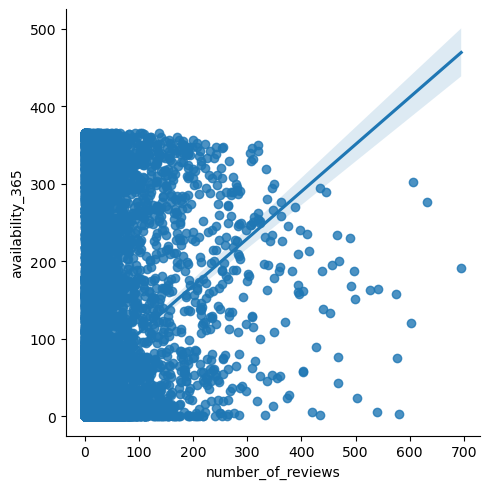

In [17]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sca = sns.lmplot(x = 'number_of_reviews', y = 'availability_365', data = df)

Although the relationship is weak to begin with, I really cannot see it in the scatterplot.

# 06. A pair plot

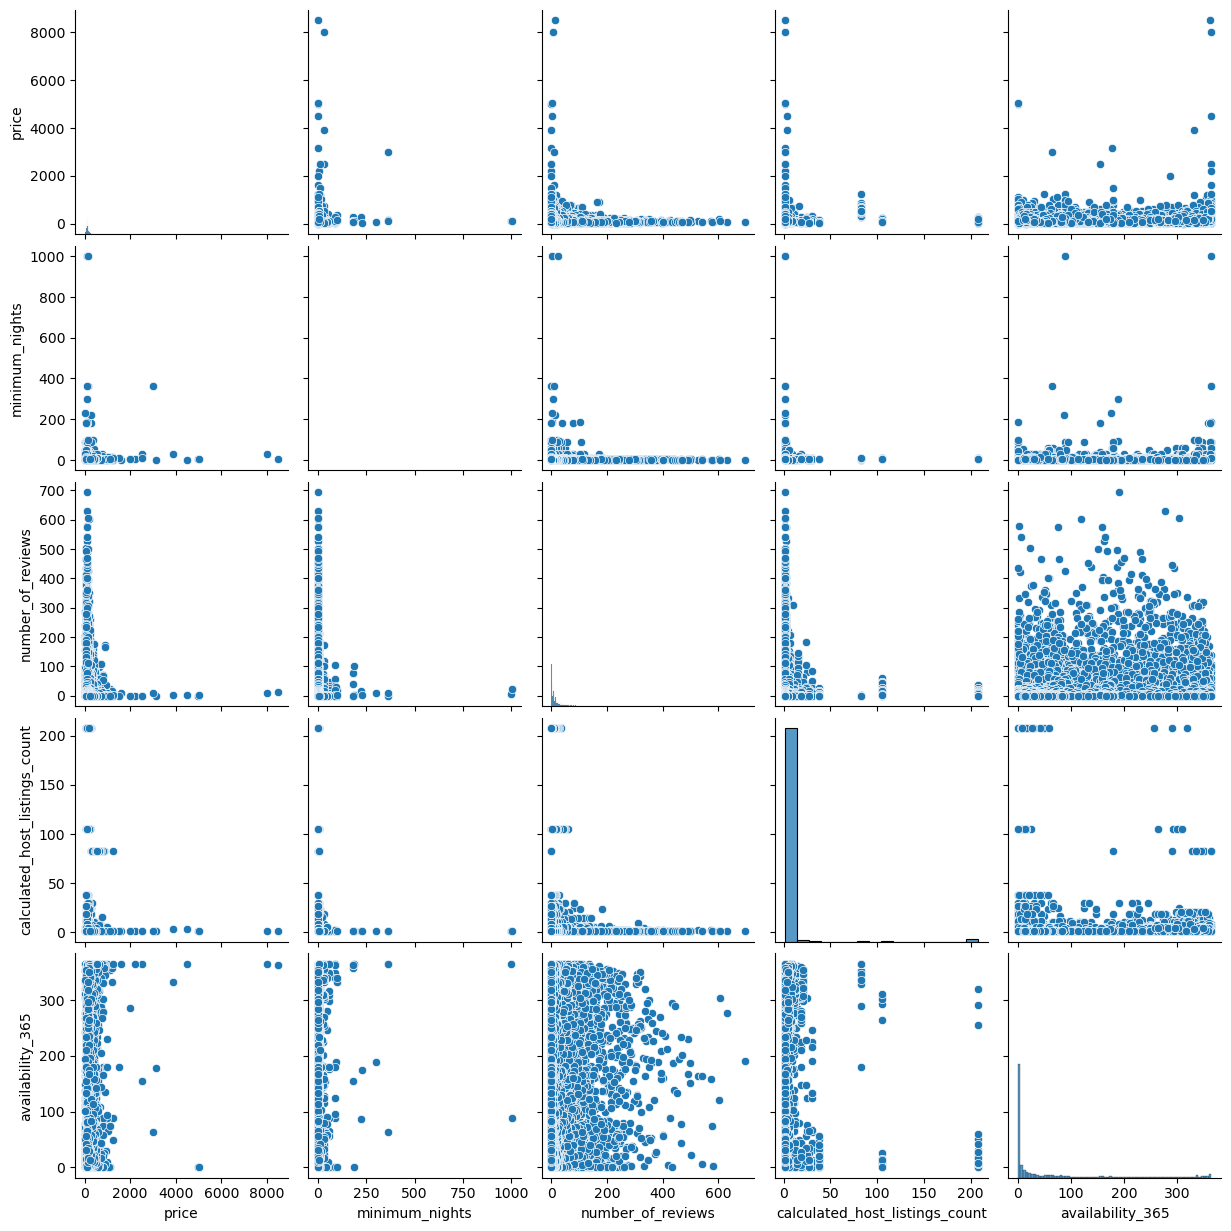

In [20]:
g = sns.pairplot(df)

At first I was very underwhelmed by the lack of correlations in data and was woried for what conclusions I can make based on this. But now when I'm looking at all these variables alltogether I thought that it might be beneficial for the analysis if I made analysis on portions of it. For example, it might be worth exploring if I treated people who have more than 50 properties as outliers, or at least seprate owners that rent a room as a side hustle vs their main business.

# 07. Categorical plot

<Axes: xlabel='room_type', ylabel='Count'>

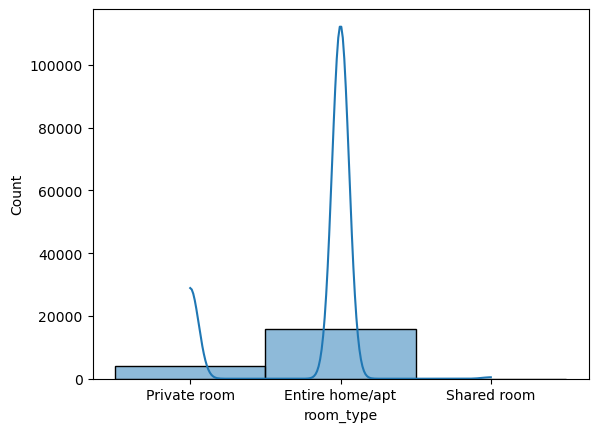

In [23]:
sns.histplot(df1, bins = 20, kde = True)

This plot shows that the majority of listings are entire homes, the second most popular option is private room, and the least popular rental properties are a shared room.

# 04. Exporting data

In [26]:
sca.savefig("Scatterplot")

# 05. Hypothesis

"Are properties with longer minimum nights are cheaper or more expensive compared to
the properPes available for 1 night?" - the weak positive correlation indicates that they tend to be more expensive.
"What are the characterics of properties that are available all year round compared to
those that are available only some days?" - the weak positive correlation indicates that they are more expensive.

The data shows that I really need to separate it homeowners into at least two groups: those who have less than 50 properties and those who have more.